<a href="https://colab.research.google.com/github/shreeramshah021380/ai-lab-sheet-lab/blob/main/KNN%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


New Point 1: {'Age': 35, 'Salary': 60000}
   Age  Salary Class      Distance  Rank
8   50   59182     B    818.137519     1
5   23   61657     B   1657.043451     2
2   48   62492     B   2492.033908     3
7   32   52597     A   7403.000608     4
1   20   79232     A  19232.005850     5
0   33   38923     A  21077.000095     6
9   49   81904     B  21904.004474     7
3   20   36869     A  23131.004864     8
6   38   35029     A  24971.000180     9
4   43   97899     B  37899.000844    10
Predicted Class: B

New Point 2: {'Age': 25, 'Salary': 75000}
   Age  Salary Class      Distance  Rank
1   20   79232     A   4232.002954     1
9   49   81904     B   6904.041715     2
2   48   62492     B  12508.021146     3
5   23   61657     B  13343.000150     4
8   50   59182     B  15818.019756     5
7   32   52597     A  22403.001094     6
4   43   97899     B  22899.007075     7
0   33   38923     A  36077.000887     8
3   20   36869     A  38131.000328     9
6   38   35029     A  39971.002114

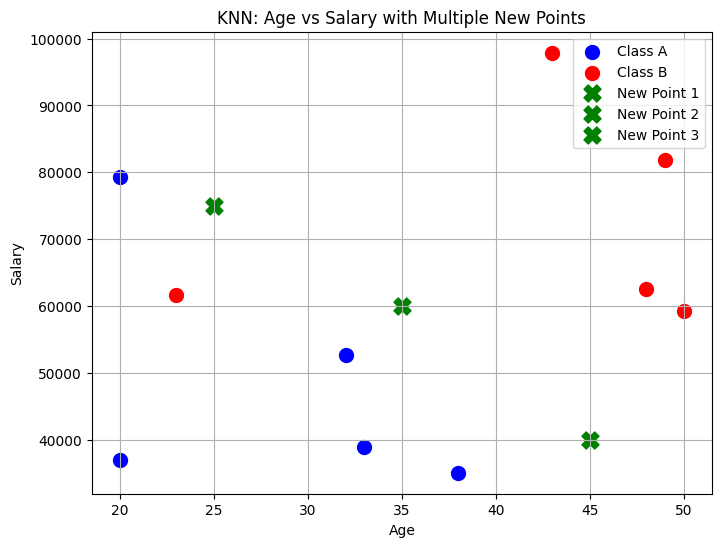

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Age': [33, 20, 48, 20, 43, 23, 38, 32, 50, 49],
    'Salary': [38923, 79232, 62492, 36869, 97899, 61657, 35029, 52597, 59182, 81904],
    'Class': ['A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B']
}
df = pd.DataFrame(data)

new_points = [
    {'Age': 35, 'Salary': 60000},
    {'Age': 25, 'Salary': 75000},
    {'Age': 45, 'Salary': 40000}
]

K = 3
colors = {'A': 'blue', 'B': 'red'}

plt.figure(figsize=(8, 6))
for label in df['Class'].unique():
    subset = df[df['Class'] == label]
    plt.scatter(subset['Age'], subset['Salary'], c=colors[label], label=f'Class {label}', s=100)

for idx, point in enumerate(new_points, 1):
    df['Distance'] = np.sqrt((df['Age'] - point['Age'])**2 + (df['Salary'] - point['Salary'])**2)
    df['Rank'] = df['Distance'].rank(method='first').astype(int)
    df_sorted = df.sort_values('Rank')

    print(f"\nNew Point {idx}: {point}")
    print(df_sorted[['Age', 'Salary', 'Class', 'Distance', 'Rank']])
    nearest_neighbors = df_sorted.head(K)
    predicted_class = nearest_neighbors['Class'].mode()[0]
    print(f"Predicted Class: {predicted_class}")

    plt.scatter(point['Age'], point['Salary'], c='green', s=150, marker='X', label=f'New Point {idx}')

plt.title('KNN: Age vs Salary with Multiple New Points')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()